Imports

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

Reading data and converting to dataframe. Creating new dataframes for each flow range. 

In [66]:
flows = pd.read_csv("flow.csv", converters={"MF":int})

df = pd.DataFrame(flows)

catchall = []

range0_1500 = {
    'Month' : [],
    'Day' : [],
    'Flow' : [],
    }
range0_1500df = pd.DataFrame(range0_1500)


range1500_3500 = {
    'Month' : [],
    'Day' : [],
    'Flow' : [],
    }
range1500_3500df = pd.DataFrame(range1500_3500)

range3500_7500 = {
    'Month' : [],
    'Day' : [],
    'Flow' : [],
    }
range3500_7500df = pd.DataFrame(range3500_7500)

range7500_10000 = {
    'Month' : [],
    'Day' : [],
    'Flow' : [],
    }
range7500_10000df = pd.DataFrame(range7500_10000)


rangeOver10000 = {
    'Month' : [],
    'Day' : [],
    'Flow' : [],
    }
rangeOver10000df = pd.DataFrame(rangeOver10000)


New row function.

In [67]:
x = 0
def new_row(dataFrame, flow):
    new_row = {'Month': df['Month'][x], 'Day': df['Day'][x], 'Flow': flow}
    return new_row

Sorting days into corresponding dataframe flow ranges.

In [68]:



for flow in df['MF']:
    if flow <= 1500:
        range0_1500df = range0_1500df.append(new_row(range0_1500df, flow), ignore_index=True)
        x += 1
    elif ((flow > 1500) & (flow <= 3500)):
        range1500_3500df = range1500_3500df.append(new_row(range1500_3500df, flow), ignore_index=True)
        x += 1
    elif ((flow > 3500) & (flow <= 7500)):
        range3500_7500df = range3500_7500df.append(new_row(range3500_7500df, flow), ignore_index=True)
        x += 1
    elif ((flow > 7500) & (flow <= 10000)):
        range7500_10000df = range7500_10000df.append(new_row(range7500_10000df, flow), ignore_index=True)
        x += 1
    elif (flow > 10000):
        rangeOver10000df = rangeOver10000df.append(new_row(rangeOver10000df, flow), ignore_index=True)
        x += 1
    else:
        catchall.append(flow)
        x += 1


Display Settings

In [69]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

Range 0-1500

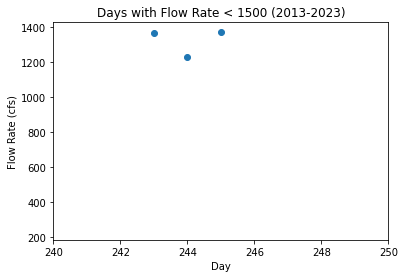

,Month,Day,Flow
0,8.0,243.0,1365.0
1,8.0,244.0,1233.0
2,9.0,245.0,1372.0


In [70]:
plt.scatter(range0_1500df['Day'], range0_1500df['Flow'], linestyle='None')
plt.title("Days with Flow Rate < 1500 (2013-2023)")
plt.xlabel("Day")
plt.ylabel("Flow Rate (cfs)")
plt.xlim(240, 250)

for i in range(len(range0_1500df['Day'])):
    for j in range(i + 1, len(range0_1500df['Day'])):
        if abs(range0_1500df['Day'][i] - range0_1500df['Day'][j]) <= 1:
            plt.plot([range0_1500df['Day'][i], range0_1500df['Day'][j]], color='gray', linestyle='--')

plt.show()

display(range0_1500df)

Range 1500-3500

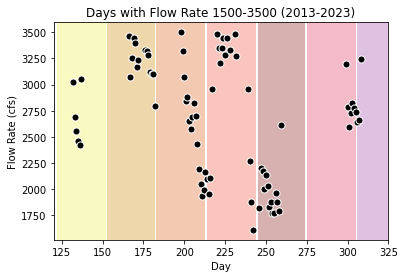

,Month,Day,Flow
0,5.0,132.0,3020.0
1,5.0,133.0,2686.0
2,5.0,134.0,2558.0
3,5.0,135.0,2457.0
4,5.0,136.0,2425.0
5,5.0,137.0,3054.0
6,6.0,166.0,3468.0
7,6.0,167.0,3074.0
8,6.0,168.0,3250.0
9,6.0,169.0,3447.0


In [101]:
plt.scatter(range1500_3500df['Day'], range1500_3500df['Flow'], marker='o', edgecolor='white',color='black', linestyle='None', zorder=2, s=50)
plt.title("Days with Flow Rate 1500-3500 (2013-2023)")
plt.xlabel("Day")
plt.ylabel("Flow Rate (cfs)")
plt.xlim(120, 325)
plt.axvspan(1, 31, facecolor='lightblue', alpha=0.5)
plt.axvspan(32, 60, facecolor="#a5d6c5", alpha=.5)
plt.axvspan(61, 91, facecolor="#84ad89", alpha=0.5)
plt.axvspan(92, 121, facecolor="#b0c27a", alpha=0.5)
plt.axvspan(122, 152, facecolor="#f5f587", alpha=0.5)
plt.axvspan(153, 182, facecolor="#e0b15a", alpha=0.5)
plt.axvspan(183, 213, facecolor="#e89464", alpha=0.5)
plt.axvspan(214, 244, facecolor="#f58d7d", alpha=0.5)
plt.axvspan(245, 274, facecolor="#b06363", alpha=0.5)
plt.axvspan(275, 305, facecolor="#ed7792", alpha=0.5)
plt.axvspan(306, 335, facecolor="#c086c4", alpha=0.5)
plt.axvspan(336, 366, facecolor="#b6abcc", alpha=0.5)


plt.show()

display(range1500_3500df)

Range 3500-7500

In [ ]:
display(range3500_7500df)

,Month,Day,Flow
0,1.0,21.0,6959.0
1,1.0,22.0,6672.0
2,1.0,23.0,6417.0
3,1.0,24.0,6662.0
4,1.0,25.0,7482.0
5,2.0,33.0,7136.0
6,2.0,34.0,6705.0
7,2.0,35.0,7064.0
8,2.0,43.0,7069.0
9,3.0,84.0,6957.0


Range 7500-10000


In [ ]:
display(range7500_10000df)

,Month,Day,Flow
0,1.0,1.0,9668.0
1,1.0,2.0,9975.0
2,1.0,9.0,9889.0
3,1.0,10.0,9194.0
4,1.0,11.0,8929.0
5,1.0,12.0,9118.0
6,1.0,13.0,9724.0
7,1.0,16.0,9963.0
8,1.0,17.0,9599.0
9,1.0,18.0,9163.0


Range 10000+


In [ ]:
display(rangeOver10000df)

,Month,Day,Flow
0,1.0,3.0,10496.0
1,1.0,4.0,11628.0
2,1.0,5.0,12588.0
3,1.0,6.0,12620.0
4,1.0,7.0,11800.0
5,1.0,8.0,10762.0
6,1.0,14.0,10100.0
7,1.0,15.0,10204.0
8,2.0,48.0,10880.0
9,2.0,49.0,11212.0


All flows graph

No handles with labels found to put in legend.


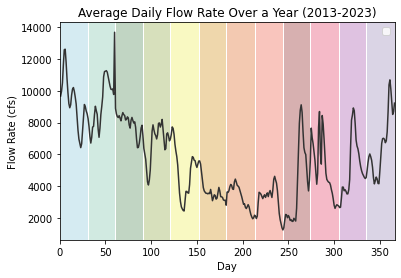

In [ ]:
plt.plot(df["Day"], df["MF"], color='#333333')
plt.title("Average Daily Flow Rate Over a Year (2013-2023)")
plt.xlabel("Day")
plt.ylabel("Flow Rate (cfs)")
plt.xlim(0, 366)
plt.axvspan(1, 31, facecolor='lightblue', alpha=0.5)
plt.axvspan(32, 60, facecolor="#a5d6c5", alpha=0.5)
plt.axvspan(61, 91, facecolor="#84ad89", alpha=0.5)
plt.axvspan(92, 121, facecolor="#b0c27a", alpha=0.5)
plt.axvspan(122, 152, facecolor="#f5f587", alpha=0.5)
plt.axvspan(153, 182, facecolor="#e0b15a", alpha=0.5)
plt.axvspan(183, 213, facecolor="#e89464", alpha=0.5)
plt.axvspan(215, 244, facecolor="#f58d7d", alpha=0.5)
plt.axvspan(245, 274, facecolor="#b06363", alpha=0.5)
plt.axvspan(275, 305, facecolor="#ed7792", alpha=0.5)
plt.axvspan(306, 335, facecolor="#c086c4", alpha=0.5)
plt.axvspan(336, 366, facecolor="#b6abcc", alpha=0.5)

plt.legend()


plt.show()



All flows dataframe

In [ ]:
display(df)

,Month,Day,MF
0,1,1,9668
1,1,2,9975
2,1,3,10496
3,1,4,11628
4,1,5,12588
5,1,6,12620
6,1,7,11800
7,1,8,10762
8,1,9,9889
9,1,10,9194
